In [2]:
import deeppavlov
from deeppavlov import build_model

import pandas as pd
import numpy as np
import json, os, gzip, re, ujson

from tqdm import tqdm_notebook

from nltk import sent_tokenize

from itertools import chain 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
remove_html = lambda text: re.sub("(<[^<^>]+>)|(&[a-z]+;)|(\[-vote:[0-9]+:-\])", " ", text)
true_sentenize = lambda text: [sentence.strip() \
                               for sentence in chain.from_iterable([sentence.split('\n') \
                                    for sentence in sent_tokenize(text)]) if len(sentence) > 1]
beautify = lambda text: re.sub("([^.?!])\n", r"\1.\n", \
                               re.sub(' +\.', '.', \
                                   re.sub('\n+', '\n', \
                                     re.sub(" *\n *", '\n', \
                                        re.sub(" +", " ", text.strip())))))

def remove_1st_sent_extrainfo(text, textid):
    i = 0
    try:
        while text[i] not in {'.', '?', '!', '\n'}:
            i+=1
    except IndexError:
        return text, ""
    return text[:i+1], text[i+1:].strip()

def filter_with_ner(text, ner_model):
    sentences = true_sentenize(text)
    if len(sentences) == 0:
        return ""
    try:
        filtered = [sentences[i] for i, sent in enumerate(ner_model(sentences)[1]) if any(np.array(sent) != 'O')]
    except Exception as e:
        print(sentences)
        return ""
    return " ".join(filtered)

In [5]:
dataset = list()
with open('ria_news_dataset/ria.json', 'r') as fp:
    for line in tqdm_notebook(fp.readlines()):
        dataset.append(list(json.loads(line).values()))

HBox(children=(IntProgress(value=0, max=1003869), HTML(value='')))

In [6]:
dataset = pd.DataFrame(dataset, columns=['text', 'title'])

In [7]:
dataset.head()

,text,title
0,"<p><strong></strong></p>\n<p><strong>москва, 3...","большинство детей, которых пытались увезти в с..."
1,"<p><strong></strong></p>\n<p><strong>киев, 31 ...","луценко будет работать в команде тимошенко, ес..."
2,"<p><strong></strong></p>\n<p><strong>киев, 31 ...","""лютые"" выборы: есть ли вероятность второго ма..."
3,"<p><strong></strong></p>\n<p><strong>мехико, 3...",жертвами бойни на севере мексики стали 13 моло...
4,"<p><strong></strong></p>\n<p><strong>москва, 3...",немец беррер выиграл теннисный турнир на родин...


In [8]:
%%time
dataset['clean_text'] = dataset['text'].apply(remove_html)
dataset['beautiful_text'] = dataset['clean_text'].apply(beautify)

CPU times: user 4min 30s, sys: 732 ms, total: 4min 30s
Wall time: 4min 30s


In [9]:
dataset = dataset[dataset.beautiful_text.map(lambda x: len(x) > 15)]

In [20]:
extra

('москва, 31 янв - риа новости.',
 'киев, 31 янв - риа новости, марина шмаюн.',
 'киев, 31 янв - риа новости.',
 'мехико, 31 янв - риа новости, юрий николаев.',
 'москва, 31 янв - риа новости.',
 'сараево, 31 янв - риа новости, юлия петровская.',
 'афины, 31 янв - риа новости, алексей богдановский.',
 'москва, 31 янв риа новости.',
 'афины, 31 янв - риа новости, алексей богдановский.',
 'москва, 31 янв - риа новости.',
 'москва, 31 янв - риа новости.',
 'москва, 31 янв - риа новости, виктор хруль.',
 'москва, 31 янв риа новости.',
 'сараево, 31 янв - риа новости, юлия петровская.',
 'москва, 31 янв - риа новости.',
 'москва, 31 янв риа новости.',
 'уфа, 31 янв - риа новости, рамиля салихова.',
 'москва, 31 янв - риа новости.',
 'москва, 31 янв - риа новости.',
 'москва, 31 янв - риа новости.',
 'москва, 31 янв риа новости.',
 'газа, 31 янв - риа новости, назар альян.',
 'москва, 31 янв риа новости.',
 'москва, 31 янв - риа новости, виктор хруль.',
 'москва, 31 янв - риа новости.',
 'мо

In [10]:
extra, texts = zip(*[remove_1st_sent_extrainfo(text, textid) for textid, text in \
                     tqdm_notebook(enumerate(dataset['beautiful_text']))])

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

1870
21548
24422
24889
24890
24989
25366
42599
42623
42625
43209
43515
43523
44500
44555
44572
44713
45009
45398
45495
45924
46062
46073
46082
46266
46350
46426
46492
46571
46641
46672
46711
46729
46750
46755
47070
47101
47121
47478
47501
47607
47635
47706
47729
47781
47871
47940
47984
48092
48103
48265
48280
48384
48399
48421
48613
48616
48622
48722
48733
48779
48930
48974
49229
49248
49338
49422
49534
49546
49666
49667
49888
49902
49907
49910
50007
50068
50079
50178
50198
50212
50342
50406
50442
50453
50597
50656
50679
50879
50903
50906
50971
51008
51013
51023
51039
51110
51111
51114
51191
51224
51257
52566
53257
53260
53555
64630
64720
64746
64777
64929
64938
64948
65252
65313
65314
65315
65619
65624
65636
66195
66209
66220
66227
66257
66272
66303
66363
66413
66417
66740
66845
66848
66858
66894
66902
66905
67070
67668
69433
70013
70281
70374
70420
70993
71035
71099
71113
71147
71242
71296
72698
73169
78980
85759
86646
89729
94953
125110
125165
171241
181657
186097
208101
213563
2287

In [11]:
dataset['title'] = dataset['title'].map(lambda x: x.strip())

In [15]:
len(texts)

1003663

In [23]:
len([text for text in texts if len(text) > 600])

905000

In [25]:
with open('headline_gen_baselines/data/processed-ria.json', 'w') as fp:
    for i in tqdm_notebook(range(len(dataset))):
        if texts[i] != "ERROR" and len(texts[i]) > 2 and len(dataset['title'].iloc[i]) > 2 and len(texts[i].split()) < 600:
            t = {'title':dataset['title'].iloc[i], 'body':texts[i]}
            fp.write(ujson.dumps(t, ensure_ascii=False, encode_html_chars=True) + '\n')

HBox(children=(IntProgress(value=0, max=1003663), HTML(value='')))

In [16]:
dataset.shape

(1003663, 4)

Baseline\Metric | rouge-1-f	| rouge-1-p	| rouge-1-r	| rouge-2-f	| rouge-2-p	| rouge-2-r	| rouge-l-f	| rouge-l-p	| rouge-l-r |
--------- | --------- | --------- | --------- |  --------- | --------- | --------- | --------- | --------- | --------- |
First sentence	| 0.10515622 | 0.08202730 | 0.17109826 |  0.02310585 | 0.01773702 | 0.04013821 | 0.07781251 | 0.07387972 | 0.15335960 |
Seq2seq+attn    | 0.13303332 | 0.15463217 | 0.12296674 | 0.04624813  | 0.05416022 | 0.04320243 | 0.11961113 | 0.14709123 | 0.11673100 |

In [10]:
dataset['title'][0]

'большинство детей, которых пытались увезти в сша из гаити, не сироты'

In [14]:
texts[512]

'бывший глава гувд москвы владимир пронин мучается бессонницей после публикации в сми заявления адвоката игоря трунова о том, что, возможно, именно ссора с прониным послужила причиной того, что экс-глава овд "царицыно" денис евсюков расстрелял людей в столичном супермаркете в апреле прошлого года.\n"пронина мучает бессонница, ему морально тяжело переносить подобные обвинения после 40 лет безупречной службы", - сказал в пятницу защитник бывшего руководителя столичного гувд алексей дедушкин на заседании по иску пронина к трунову о защите чести , достоинства и деловой репутации в савеловском суде москвы.\nпредставитель трунова людмила айвар попросила представить доказательства того, что пронин переносит физические и нравственные страдания, на что дедушкин сообщил, что медицинских справок у него нет.\nадвокат истца также считает, что, если трунов не опровергнет распространенную им версию событий, то это может негативно сказаться на деловой репутации пронина. "такие утверждения могут повлия

In [50]:
with open('OpenNMT-py/data/train_full_sents_42.bpe', 'r') as f:
    lines = f.readlines()

In [51]:
lenghts = [len(line.split(' ')) for line in lines]

In [52]:
len(lenghts)

967059

In [66]:
np.quantile(lenghts, 0.8979)

600.0

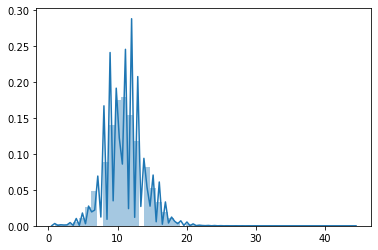

In [47]:
sns.distplot(lenghts)

text: truncated 650

title: truncated 25